In [1]:
%cd ../
%pwd

D:\Projects\IndiaTB\IndTB_ppa


'D:\\Projects\\IndiaTB\\IndTB_ppa'

In [2]:
import numpy as np
import pandas as pd
from sims_pars.fitting import ApproxBayesComSMC
from ppa import *
import matplotlib.pyplot as plt

In [3]:
dat = pd.read_csv('data/cascade/d_cascade_2019.csv')
dat = {row['State']: row for _, row in dat.iterrows()}

d = dat['India']

src_shf = pd.read_csv('data/shifting/shifting.csv')
shf = Shifting(src_shf, d.Pr_Pub_CSI)

In [4]:
alg = ApproxBayesComSMC(max_round=20, n_collect=200, n_core=4, verbose=0)

In [9]:
obj11 = ObjForward(d, shf)
p1 = obj11.sample_prior()
shf.update(p1)

In [10]:
shf.P_Dx1

array([[0.7481203 , 0.7481203 , 0.91513315],
       [0.7481203 , 0.7481203 , 0.91513315],
       [0.14068441, 0.14068441, 0.37279535]])

In [17]:
 x = 0.7
(x / (1-x)) / (0.74 / 0.26)

0.8198198198198198

In [5]:
obj11 = ObjForward(d, shf)
obj11.UsingCNR = True
obj11.UsingPrevTx = True
alg.fit(obj11)
css11 = [obj11.simulate(p) for p in alg.Collector.ParameterList]

07-06-2022 15:34:21 INFO: Initialising
07-06-2022 15:34:25 INFO: Step to 1
07-06-2022 15:34:25 INFO: Round 0, ESS 200.00
07-06-2022 15:34:36 INFO: Step to 2
07-06-2022 15:34:36 INFO: Round 1, ESS 180, Epsilon 64.1455, Acceptance 92.5%
07-06-2022 15:34:43 INFO: Step to 3
07-06-2022 15:34:43 INFO: Round 2, ESS 163, Epsilon 34.1040, Acceptance 89.0%
07-06-2022 15:34:48 INFO: Step to 4
07-06-2022 15:34:48 INFO: Round 3, ESS 151, Epsilon 26.5123, Acceptance 80.5%
07-06-2022 15:34:55 INFO: Step to 5
07-06-2022 15:34:55 INFO: Round 4, ESS 138, Epsilon 21.2491, Acceptance 79.5%
07-06-2022 15:35:00 INFO: Step to 6
07-06-2022 15:35:00 INFO: Round 5, ESS 127, Epsilon 16.8559, Acceptance 74.0%
07-06-2022 15:35:08 INFO: Step to 7
07-06-2022 15:35:08 INFO: Round 6, ESS 200, Epsilon 14.4205, Acceptance 84.0%
07-06-2022 15:35:14 INFO: Step to 8
07-06-2022 15:35:14 INFO: Round 7, ESS 180, Epsilon 10.4721, Acceptance 73.0%
07-06-2022 15:35:20 INFO: Step to 9
07-06-2022 15:35:20 INFO: Round 8, ESS 163, E

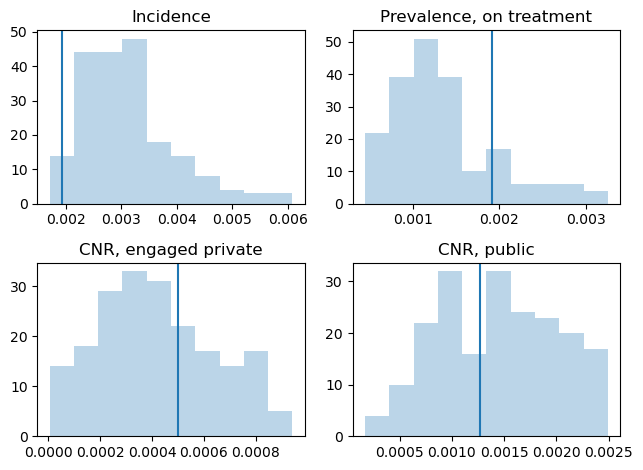

In [6]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].hist(np.array([cs.IncR for cs in css11]), alpha = 0.3)
axes[0, 0].axvline(x=0.00193)
axes[0, 0].set_title('Incidence')

axes[0, 1].hist(np.array([cs.DrugTime.sum() for cs in css11]), alpha = 0.3)
axes[0, 1].axvline(x=d.PrevTx * 1e-5)
axes[0, 1].set_title('Prevalence, on treatment')

axes[1, 1].hist(np.array([cs.CNR[0] for cs in css11]), alpha = 0.3)
axes[1, 1].axvline(x=d.CNR_pub)
axes[1, 1].set_title('CNR, public')

axes[1, 0].hist(np.array([cs.CNR[1] for cs in css11]), alpha = 0.3)
axes[1, 0].axvline(x=d.CNR_eng)
axes[1, 0].set_title('CNR, engaged private')

fig.tight_layout()
plt.show()

In [7]:
obj10 = ObjForward(d, shf)
obj10.UsingCNR = True
obj10.UsingPrevTx = False
alg.fit(obj10)
css10 = [obj10.simulate(p) for p in alg.Collector.ParameterList]

07-06-2022 15:36:25 INFO: Initialising
07-06-2022 15:36:27 INFO: Step to 22
07-06-2022 15:36:27 INFO: Round 0, ESS 200.00
07-06-2022 15:36:40 INFO: Step to 23
07-06-2022 15:36:40 INFO: Round 1, ESS 180, Epsilon 38.6215, Acceptance 89.5%
07-06-2022 15:36:46 INFO: Step to 24
07-06-2022 15:36:46 INFO: Round 2, ESS 162, Epsilon 27.7122, Acceptance 82.0%
07-06-2022 15:36:51 INFO: Step to 25
07-06-2022 15:36:51 INFO: Round 3, ESS 149, Epsilon 19.5962, Acceptance 74.5%
07-06-2022 15:36:58 INFO: Step to 26
07-06-2022 15:36:58 INFO: Round 4, ESS 136, Epsilon 15.1060, Acceptance 74.0%
07-06-2022 15:37:03 INFO: Step to 27
07-06-2022 15:37:03 INFO: Round 5, ESS 126, Epsilon 11.4638, Acceptance 72.0%
07-06-2022 15:37:08 INFO: Step to 28
07-06-2022 15:37:08 INFO: Round 6, ESS 200, Epsilon 9.2764, Acceptance 80.0%
07-06-2022 15:37:13 INFO: Step to 29
07-06-2022 15:37:13 INFO: Round 7, ESS 180, Epsilon 7.6994, Acceptance 80.0%
07-06-2022 15:37:19 INFO: Step to 30
07-06-2022 15:37:19 INFO: Round 8, ESS

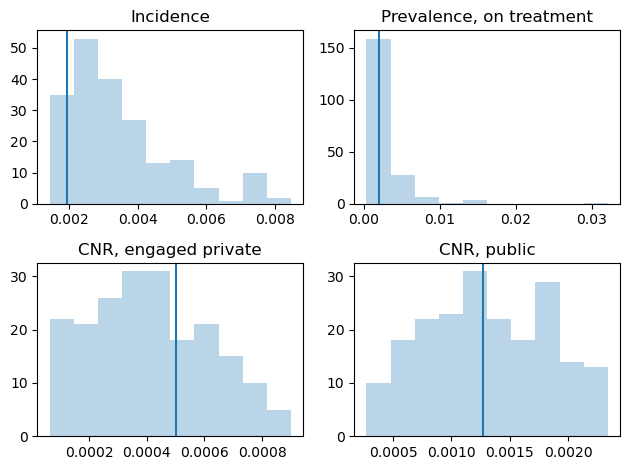

In [8]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].hist(np.array([cs.IncR for cs in css10]), alpha = 0.3)
axes[0, 0].axvline(x=0.00193)
axes[0, 0].set_title('Incidence')

axes[0, 1].hist(np.array([cs.DrugTime.sum() for cs in css10]), alpha = 0.3)
axes[0, 1].axvline(x=d.PrevTx * 1e-5)
axes[0, 1].set_title('Prevalence, on treatment')

axes[1, 1].hist(np.array([cs.CNR[0] for cs in css10]), alpha = 0.3)
axes[1, 1].axvline(x=d.CNR_pub)
axes[1, 1].set_title('CNR, public')

axes[1, 0].hist(np.array([cs.CNR[1] for cs in css10]), alpha = 0.3)
axes[1, 0].axvline(x=d.CNR_eng)
axes[1, 0].set_title('CNR, engaged private')

fig.tight_layout()
plt.show()

In [9]:
obj01 = ObjForward(d, shf)
obj01.UsingCNR = False
obj01.UsingPrevTx = True
alg.fit(obj01)
css01 = [obj01.simulate(p) for p in alg.Collector.ParameterList]

07-06-2022 15:38:24 INFO: Initialising
07-06-2022 15:38:26 INFO: Step to 43
07-06-2022 15:38:26 INFO: Round 0, ESS 200.00
07-06-2022 15:38:36 INFO: Step to 44
07-06-2022 15:38:36 INFO: Round 1, ESS 180, Epsilon 4.2688, Acceptance 91.0%
07-06-2022 15:38:42 INFO: Step to 45
07-06-2022 15:38:42 INFO: Round 2, ESS 164, Epsilon 2.1183, Acceptance 89.5%
07-06-2022 15:38:48 INFO: Step to 46
07-06-2022 15:38:48 INFO: Round 3, ESS 153, Epsilon 1.5019, Acceptance 76.0%
07-06-2022 15:38:54 INFO: Step to 47
07-06-2022 15:38:54 INFO: Round 4, ESS 141, Epsilon 1.0490, Acceptance 73.0%
07-06-2022 15:39:00 INFO: Step to 48
07-06-2022 15:39:00 INFO: Round 5, ESS 127, Epsilon 0.7522, Acceptance 73.5%
07-06-2022 15:39:06 INFO: Step to 49
07-06-2022 15:39:06 INFO: Round 6, ESS 200, Epsilon 0.6273, Acceptance 74.5%
07-06-2022 15:39:12 INFO: Step to 50
07-06-2022 15:39:12 INFO: Round 7, ESS 180, Epsilon 0.4750, Acceptance 79.0%
07-06-2022 15:39:17 INFO: Step to 51
07-06-2022 15:39:17 INFO: Round 8, ESS 163,

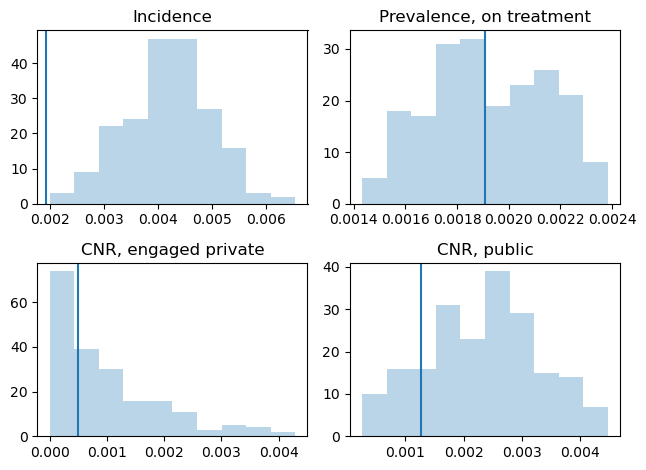

In [10]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].hist(np.array([cs.IncR for cs in css01]), alpha = 0.3)
axes[0, 0].axvline(x=0.00193)
axes[0, 0].set_title('Incidence')

axes[0, 1].hist(np.array([cs.DrugTime.sum() for cs in css01]), alpha = 0.3)
axes[0, 1].axvline(x=d.PrevTx * 1e-5)
axes[0, 1].set_title('Prevalence, on treatment')

axes[1, 1].hist(np.array([cs.CNR[0] for cs in css01]), alpha = 0.3)
axes[1, 1].axvline(x=d.CNR_pub)
axes[1, 1].set_title('CNR, public')

axes[1, 0].hist(np.array([cs.CNR[1] for cs in css01]), alpha = 0.3)
axes[1, 0].axvline(x=d.CNR_eng)
axes[1, 0].set_title('CNR, engaged private')

fig.tight_layout()
plt.show()